In [2]:
# import necessary packages
from matplotlib import pyplot as plt #1
#from pandas import read_csv
from keras.models import Sequential#2
from keras.layers import Dense, Activation #3
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score#4
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn.preprocessing import StandardScaler #5
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import statistics as stat
import scipy as ss
from scipy.stats import skew
from scipy.stats import kurtosis


In [3]:
# define path to folder where your data is and read data file
df = pd.read_csv("D:\eidee\Others\Daiyan Sir\productionData.csv")

In [4]:
#Check some basic information regarding the data
print(df.info(), '\nShape: ', df.shape)
print('Column names: \n')
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ROP (m/hr)             21 non-null     float64
 1   ROP (m/hr) fr Equ      21 non-null     float64
 2   Area (m2)              21 non-null     object 
 3   Diameter (m)           21 non-null     float64
 4   Depth of cut (mm/rev)  21 non-null     float64
 5   WOB (kN)               21 non-null     float64
 6   RPM (rev/min)          21 non-null     float64
 7   Torque (kNm)           21 non-null     float64
 8   Torque (Nm) from Equ   21 non-null     float64
 9   SE (MJ/m3)             21 non-null     float64
 10  SE(kWh/m3)             21 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.9+ KB
None 
Shape:  (21, 11)
Column names: 



Index(['ROP (m/hr)', 'ROP (m/hr) fr Equ', 'Area (m2)', 'Diameter (m)',
       'Depth of cut (mm/rev)', 'WOB (kN)', 'RPM (rev/min)', 'Torque (kNm)',
       'Torque (Nm) from Equ', 'SE (MJ/m3)', 'SE(kWh/m3)'],
      dtype='object')

In [5]:
# Rename columns for ease of use

df = df.rename(columns={'ROP (m/hr)': 'ROP'})
df = df.rename(columns={'ROP (m/hr) fr Equ': 'ROP_fr_eq'})

df = df.rename(columns={'Area (m2)': 'Area'})
df = df.rename(columns={'Diameter (m)': 'Diameter'})

df = df.rename(columns={'Depth of cut (mm/rev)': 'Depth_of_cut'})
df = df.rename(columns={'WOB (kN)': 'WOB'})

df = df.rename(columns={'RPM (rev/min)': 'RPM'})
df = df.rename(columns={'Torque (kNm)': 'Torque'})

df = df.rename(columns={'Torque (Nm) from Equ': 'Torque_from_Equ'})

df = df.rename(columns={'SE (MJ/m3)': 'SE_mj'})
df = df.rename(columns={'SE(kWh/m3)': 'SE_kwh'})

In [6]:
# select columns that are necessary
feature_names = ['ROP', 'Depth_of_cut','WOB','RPM','Torque','SE_kwh']
df2 = df[feature_names] # define a new dataframe and keep the original
print(df2.head())

    ROP  Depth_of_cut    WOB   RPM  Torque  SE_kwh
0  0.76      1.541596  718.5  8.14    29.2  135.36
1  0.70      1.293456  608.8  8.14    28.9  144.00
2  0.51      0.989367  497.2  8.42    23.6  168.48
3  1.03      1.564488  730.7  8.14    37.0  126.36
4  0.50      1.008401  503.9  8.14    25.0  179.28


In [7]:
print(df2.describe()) # we need to scale the data to normalize

             ROP  Depth_of_cut         WOB        RPM     Torque      SE_kwh
count  21.000000     21.000000   21.000000  21.000000  21.000000   21.000000
mean    0.583333      1.158442  565.195238   8.118095  26.700000  170.280000
std     0.198074      0.325098  124.725372   0.241384   4.888558   33.264468
min     0.300000      0.459498  307.000000   7.500000  19.400000  126.360000
25%     0.410000      0.988798  497.000000   8.000000  22.500000  144.000000
50%     0.530000      1.264407  597.500000   8.140000  26.100000  164.520000
75%     0.700000      1.435963  668.000000   8.280000  29.200000  190.440000
max     1.030000      1.564488  730.700000   8.420000  37.000000  240.840000


In [8]:
#statistical analysis
stat.mean(df.ROP)
M= stat.mean(df.ROP)
print(M)

0.5833333333333334


In [9]:
stat.median(df.ROP)

0.53

In [10]:
stat.median_low(df.ROP)

0.53

In [11]:
stat.median_high(df.ROP)

0.53

In [12]:
stat.mode(df.ROP)

0.51

In [13]:
stat.harmonic_mean(df.ROP)

0.5209942911494412

In [14]:
stat.geometric_mean(df.ROP)

0.5516489806600607

In [15]:
stat.stdev(df.ROP)#6
STD= stat.stdev(df.ROP)

In [16]:
stat.pstdev(df.ROP)

0.19330048982110565

In [17]:
stat.variance(df.ROP)

0.039233333333333335

In [18]:
stat.pvariance(df.ROP)

0.037365079365079365

In [19]:
CV= (STD/M)*100
print(CV)

33.95555318113275


In [20]:
skew(df.ROP)

0.45975202537931825

In [21]:
kurtosis(df.ROP)

-0.5531842183336955

In [22]:
# Here we start processing for deep learning model
# First, Split into features (X) and target (Y = ROP)
X = df2.drop('ROP', axis = 1)
y = df2['ROP']

In [23]:
# Split into train and test, 0.2 = 20% data assigned for testing, 80% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20) #7

In [24]:
(X_train.shape, X_test.shape)

((16, 5), (5, 5))

In [25]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
scaler=StandardScaler() #8
scaler.fit(X_train)

StandardScaler()

In [26]:
print(X_train)

    Depth_of_cut    WOB   RPM  Torque  SE_kwh
12      0.745739  412.0  8.42    20.4  240.84
13      0.988798  497.0  8.28    22.5  196.56
17      0.733535  407.7  8.28    21.8  190.44
14      1.265185  597.8  8.14    25.7  177.12
20      1.018038  507.3  8.00    24.7  160.92
10      1.264407  597.5  7.74    26.1  185.40
5       0.733535  407.7  8.28    21.0  193.68
8       1.129076  547.0  8.28    26.4  150.12
6       1.550168  723.0  7.71    36.0  136.08
0       1.541596  718.5  8.14    29.2  135.36
2       0.989367  497.2  8.42    23.6  168.48
7       1.435963  668.0  8.31    31.7  138.96
11      1.552053  724.0  7.50    30.0  164.52
9       0.914528  471.0  8.00    22.2  219.24
15      1.288097  606.7  8.14    28.5  144.00
3       1.564488  730.7  8.14    37.0  126.36


In [27]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) #preprocessing ends here


In [28]:
# define the model
#Experiment with deeper and wider networks
# We are using TWO dense layers, 1st with 128 nodes, 2nd with 64 nodes
# input_dim = predictor variables
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
model = Sequential() #9
model.add(Dense(128, input_dim=5, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) #9
#Adam uses estimations of the first and second moments of the gradient to adapt the learning rate for each weight of the neural network. 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100) #10

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.7037 - mae: 0.8109 - val_loss: 0.8170 - val_mae: 0.8856
Epoch 2/100
1/1 [==============================] - 0s 74ms/step - loss: 0.5736 - mae: 0.7362 - val_loss: 0.6641 - val_mae: 0.7981
Epoch 3/100
1/1 [==============================] - 0s 68ms/step - loss: 0.4616 - mae: 0.6640 - val_loss: 0.5311 - val_mae: 0.7121
Epoch 4/100
1/1 [==============================] - 0s 69ms/step - loss: 0.3661 - mae: 0.5940 - val_loss: 0.4187 - val_mae: 0.6279
Epoch 5/100
1/1 [==============================] - 0s 64ms/step - loss: 0.2865 - mae: 0.5268 - val_loss: 0.3236 - val_mae: 0.5457
Epoch 6/100
1/1 [==============================] - 0s 63ms/step - loss: 0.2201 - mae: 0.4614 - val_loss: 0.2416 - val_mae: 0.4627
Epoch 7/100
1/1 [==============================] - 0s 62ms/step - loss: 0.1660 - mae: 0.3983 - val_loss: 0.1779 - val_mae: 0.3827
Epoch 8/100
1/1 [==============================] - 0s 58ms/step - loss: 0.1231 - mae: 0.3374

1/1 [==============================] - 0s 55ms/step - loss: 0.0035 - mae: 0.0432 - val_loss: 0.0588 - val_mae: 0.1974
Epoch 64/100
1/1 [==============================] - 0s 58ms/step - loss: 0.0033 - mae: 0.0420 - val_loss: 0.0583 - val_mae: 0.1983
Epoch 65/100
1/1 [==============================] - 0s 61ms/step - loss: 0.0032 - mae: 0.0413 - val_loss: 0.0579 - val_mae: 0.1989
Epoch 66/100
1/1 [==============================] - 0s 59ms/step - loss: 0.0030 - mae: 0.0408 - val_loss: 0.0575 - val_mae: 0.1991
Epoch 67/100
1/1 [==============================] - 0s 63ms/step - loss: 0.0029 - mae: 0.0404 - val_loss: 0.0571 - val_mae: 0.1991
Epoch 68/100
1/1 [==============================] - 0s 60ms/step - loss: 0.0028 - mae: 0.0401 - val_loss: 0.0567 - val_mae: 0.1987
Epoch 69/100
1/1 [==============================] - 0s 63ms/step - loss: 0.0027 - mae: 0.0398 - val_loss: 0.0563 - val_mae: 0.1981
Epoch 70/100
1/1 [==============================] - 0s 63ms/step - loss: 0.0025 - mae: 0.0395 - 

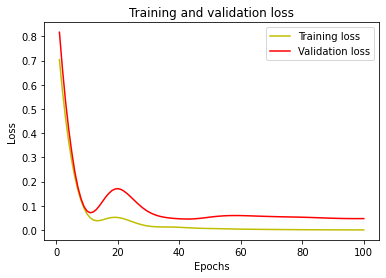

In [30]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

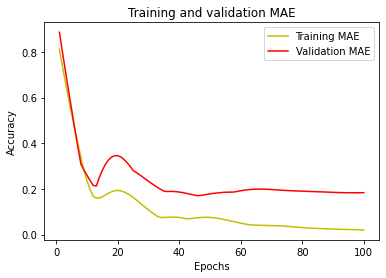

In [31]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
print(X_test_scaled) 

[[-2.39792255 -2.29180362  1.20836224 -1.47906416  2.05394611]
 [ 0.40939687  0.33369743 -0.43540178  0.45235983 -0.68274027]
 [ 1.31950485  1.38721464 -0.43540178  1.02162163 -0.95755397]
 [-0.54450836 -0.57318275  0.11251956 -0.34054054  0.27910766]
 [ 0.4180062   0.34242582  0.11251956  0.45235983 -0.84304826]]


In [33]:
print(X_test_scaled[1,:])

[ 0.40939687  0.33369743 -0.43540178  0.45235983 -0.68274027]


In [34]:
model.predict(X_test_scaled[:5])

array([[0.37797242],
       [0.37945545],
       [0.7812112 ],
       [0.2613008 ],
       [0.4751659 ]], dtype=float32)

In [35]:
#Predict on test data
predictions = model.predict(X_test_scaled[:5])#11
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[0.37797242]
 [0.37945545]
 [0.7812112 ]
 [0.2613008 ]
 [0.4751659 ]]
Real values are:  16    0.30
19    0.67
18    0.78
4     0.50
1     0.70
Name: ROP, dtype: float64


In [36]:
#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

1/1 [==============================] - 0s 103ms/step - loss: 0.0396 - mae: 0.1667
Mean squared error from neural net:  0.039604999125003815
Mean absolute error from neural net:  0.16665229201316833


In [37]:
model.evaluate(X_test_scaled, y_test) #12

1/1 [==============================] - 0s 117ms/step - loss: 0.0396 - mae: 0.1667


[0.039604999125003815, 0.16665229201316833]

In [38]:
#Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  7.58755773163138e-05
Mean absolute error from linear regression:  0.008006697605628466


In [39]:
### Decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  0.003320000000000001
Mean absolute error using decision tree:  0.040000000000000015


In [40]:
#random forrest
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(X_train_scaled, y_train)

y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

Mean squared error using Random Forest:  0.0016080444444444466
Mean absolute error Using Random Forest:  0.031999999999999994


In [41]:
#Feature ranking...
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

SE_kwh          0.690100
Torque          0.193432
WOB             0.059391
Depth_of_cut    0.043660
RPM             0.013417
dtype: float64


In [ ]:
#MAE is less biased for higher values. It may not adequately reflect the performance when dealing with large error values. MSE is highly biased for higher values. RMSE is better in terms of reflecting performance when dealing with large error values.